In [2]:
import pandas as pd

# Path to your dataset
file_path = 'Data/AFAD_1900_today_31461754_4_9.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

                  Date  Longitude  Latitude  Depth Type  Magnitude Location  \
0  29/04/1903 16:07:56      42.65     39.15   33.0   MS        5.0        -   
1  30/04/1903 04:12:56      42.65     39.15   10.0   MS        4.6        -   
2  03/05/1903 01:56:56      41.50     38.70   10.0   MS        4.9        -   
3  21/05/1903 20:56:56      42.50     39.00   10.0   MS        4.2        -   
4  26/05/1903 08:05:56      29.00     40.65   10.0   MS        5.9        -   

   EventID               TimeName               TypeName  \
0     7821  Ambraseys-Finkel 1987  Ambraseys-Finkel 1987   
1     7822  Ambraseys-Finkel 1987  Ambraseys-Finkel 1987   
2     7823      Ayhan ve Diğ.1981      Ayhan ve Diğ.1981   
3     7824  Ambraseys-Finkel 1987  Ambraseys-Finkel 1987   
4     7825  Ambraseys-Finkel 1987  Ambraseys-Finkel 1987   

           MagnitudeName  
0  Ambraseys-Finkel 1987  
1  Ambraseys-Finkel 1987  
2      Ayhan ve Diğ.1981  
3  Ambraseys-Finkel 1987  
4  Ambraseys-Finkel 1987  


In [3]:
# Assume 'Latitude' and 'Longitude' are the columns you need
data = df[['Latitude', 'Longitude']]

# KNN approach

In [13]:
from sklearn.cluster import KMeans

# Number of clusters
k = 20  # You can adjust this based on your specific needs

# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)

# Fit the model
data['Cluster'] = kmeans.fit_predict(data[['Latitude', 'Longitude']])

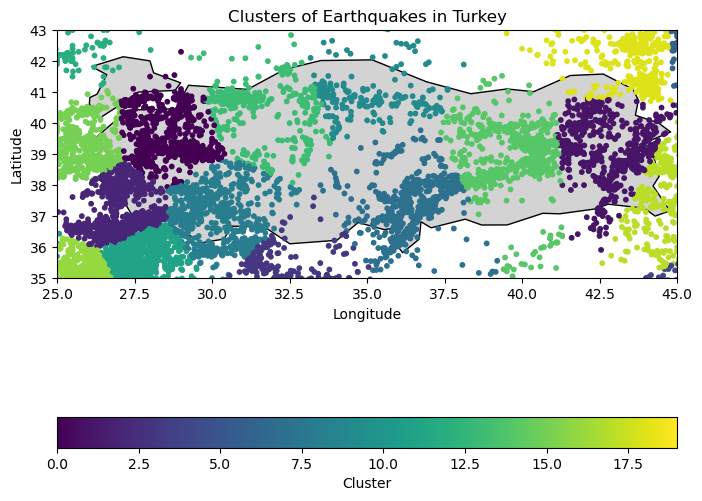

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile for Turkey
world = gpd.read_file('Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
turkey = world[world['NAME'] == 'Turkey']

# Assuming 'data' is already prepared and contains 'Longitude', 'Latitude', and 'Cluster'
# Convert earthquake data to GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))
fig, ax = plt.subplots(1, 1, figsize=(8, 12))

# Plot Turkey map
turkey.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot clusters
scatter = gdf.plot(ax=ax, column='Cluster', cmap='viridis', markersize=10, legend=True, legend_kwds={'label': "Cluster", 'orientation': "horizontal"})

# Set plot limits to focus on Turkey (adjust these as necessary)
ax.set_xlim(25, 45)
ax.set_ylim(35, 43)

# Add title and labels
plt.title('Clusters of Earthquakes in Turkey')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


# Spectral Clustering approach

In [68]:
import pandas as pd
from sklearn.cluster import SpectralClustering

# Assuming 'data' is already loaded and contains 'Longitude' and 'Latitude'
# Define the number of clusters and neighbors
n_clusters = 20
n_neighbors = 10  # Ensure there are enough data points

# Create and apply spectral clustering
sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=n_neighbors, random_state=42)
clusters = sc.fit_predict(data[['Longitude', 'Latitude']])

# Add cluster labels to your data
data['spectral_cluster'] = clusters
print("Cluster labels:", clusters)


Cluster labels: [16 16 16 ... 18 12  2]


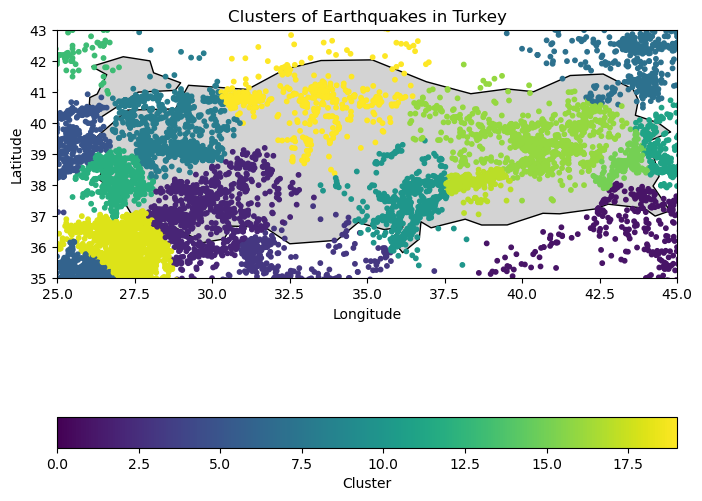

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile for Turkey
world = gpd.read_file('Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
turkey = world[world['NAME'] == 'Turkey']

# Assuming 'data' is already prepared and contains 'Longitude', 'Latitude', and 'Cluster'
# Convert earthquake data to GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))
fig, ax = plt.subplots(1, 1, figsize=(8, 12))

# Plot Turkey map
turkey.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot clusters
scatter = gdf.plot(ax=ax, column='spectral_cluster', cmap='viridis', markersize=10, legend=True, legend_kwds={'label': "Cluster", 'orientation': "horizontal"})

# Set plot limits to focus on Turkey (adjust these as necessary)
ax.set_xlim(25, 45)
ax.set_ylim(35, 43)

# Add title and labels
plt.title('Clusters of Earthquakes in Turkey')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
